In [32]:
# importing the modules
from scipy import random
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

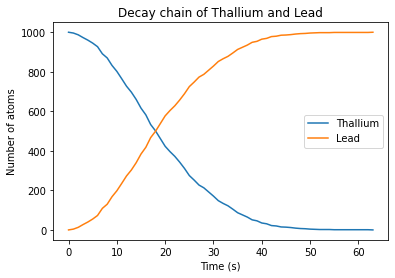

<ipython-input-33-27e11649e23f>:60: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  decay_count = np.sum((x >= i-1) and (x < i) for x in decay_times)


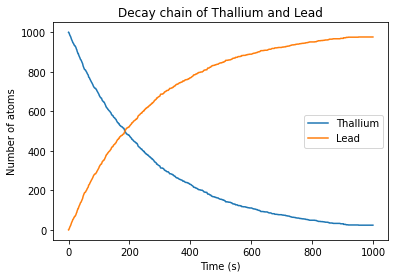

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Set initial number of Thallium and Lead atoms
num_tl, num_pb = 1000, 0

# Define decay probability as a function of time
tau = 3.052*60 
decay_prob = lambda t: 1 - 2**(-t/tau)

# Record the evolution of the number of Tl and Pb atoms over time
evolution_history = [(num_tl, num_pb)]

# Simulate the decay process for a specified number of time steps
for t in range(1, 1000):
    # Generate random numbers for each Thallium atom
    random_nums = np.random.random(num_tl)
    
    # Count the number of decaying atoms based on the decay probability
    num_decayed = sum(random_nums < decay_prob(t))
    
    # Update the number of Thallium and Lead atoms
    num_tl -= num_decayed
    num_pb += num_decayed
    
    # Record the updated number of atoms
    evolution_history.append((num_tl, num_pb))
    
    # Break the loop if there are no more Thallium atoms left
    if num_tl == 0:
        break

# Plot the evolution of the number of Tl and Pb atoms over time
evolution_history = np.array(evolution_history)
plt.plot(evolution_history)
plt.title('Decay chain of Thallium and Lead')
plt.xlabel('Time (s)')
plt.ylabel('Number of atoms')
plt.legend(['Thallium', 'Lead'])
plt.show()


# Set initial number of Thallium and Lead atoms
num_tl, num_pb = 1000, 0

# Define non-uniform probability distribution and its inverse CDF
tau = 3.052*60 
pdf = lambda t: (2**(-t/tau))* np.log(2)/tau
cdf = lambda x: 1 - 1/2**(x/tau)
inv_cdf = lambda x: -tau * np.log2(1 - x)

# Generate random times of decay using inverse transform sampling
decay_times = inv_cdf(np.random.random(size=num_tl))
decay_times.sort()

# Simulate the decay process based on the generated decay times
evolution_history = [(num_tl, num_pb)]
for i in range(1, len(decay_times)):
    # Count the number of decaying atoms within the current time interval
    decay_count = np.sum((x >= i-1) and (x < i) for x in decay_times)
    
    # Update the number of Thallium and Lead atoms
    if decay_count >= num_tl or num_tl == 0:
        evolution_history.append((0, 1000))
        break
    else:
        num_tl -= decay_count
        num_pb += decay_count
        evolution_history.append((num_tl, num_pb))

# Plot the evolution of the number of Tl and Pb atoms over time
evolution_history = np.array(evolution_history)
plt.plot(evolution_history)
plt.title('Decay chain of Thallium and Lead')
plt.xlabel('Time (s)')
plt.ylabel('Number of atoms')
plt.legend(['Thallium', 'Lead'])
plt.show()


2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

In [34]:
# Define the function to be integrated and the integration limits
f = lambda x: np.sin(1/(1 - x)) ** 2
a, b = 0, 2

# Define the number of points to use in the numerical integration
num_points = 10000

# Generate a set of equidistant points in the integration range
x_vals = np.linspace(a, b, num_points)

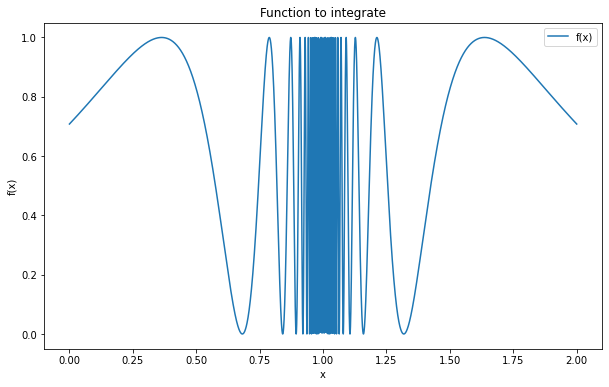

In [35]:
# Plot the function to visualize its behavior over the integration range
plt.figure(figsize=(10,6))
plt.plot(x_vals, f(x_vals))
plt.title('Function to integrate')
plt.xlabel('x')
plt.ylabel('f(x)')

# Add legend to the plot
plt.legend(['f(x)'])

plt.show()

In [36]:
from scipy.integrate import quad

def g(x):
    if x == 1:
        return 0
    else:
        return np.sin(1/(1 - x)) ** 2

# Compute the true integral of the function
Integral_true, error = quad(g, a, b)

# Generate random samples and estimate the integral using Monte Carlo simulation
N = 10000
nbr_hits = 0

for i in range(N):
    x = np.random.uniform(a, b)
    y = np.random.uniform(0, 1)
    if y <= f(x):
        nbr_hits += 1

integral_approx = (b - a) * (nbr_hits / N)

# Compute the error with respect to the true integral
error = abs(Integral_true - integral_approx)

# Print the results
print(f"True integral: {Integral_true:.5f}")
print(f"Approximated integral: {integral_approx:.5f}")
print(f"Error: {error:.5f}")


True integral: 1.34711
Approximated integral: 1.34820
Error: 0.00109


<ipython-input-36-7effdd8243da>:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Integral_true, error = quad(g, a, b)


In [37]:
# Define the number of sample points
N = 10000

# Estimate the integral using the Monte Carlo method
total = 0
for i in range(N):
    # Generate a random x value in the interval [a, b]
    x = np.random.uniform(a, b)
    
    # Add the value of the function evaluated at x to the total
    total += f(x)

# Estimate the integral by taking the average of the function values and multiplying by the interval width
integral_estimate = (b - a) * (total / N)

# Calculate the error between the estimated integral and the true integral
error = abs(integral_estimate - Integral_true)

# Print the results
print("Integral estimate:", integral_estimate)
print("Error:", error)


Integral estimate: 1.349361776640051
Error: 0.0022482752126891103


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [38]:
def f(x):
  s = np.sum(i**2 for i in x)
  if s <= 1:
    return 1
  else:
    return 0

# Limits of integration
a, b, N = -1, 1, 100000

# Number of dimensions
dim = 2

# Generating N^dim random samples from the interval [-1, 1]
x = np.random.uniform(a, b, size=(N, dim))

# Calculating the true value of the integral so we can compare it to our approximation
Integral_true = np.pi * a ** 2
print("True integral:", Integral_true)

# Approximating the integral using Monte Carlo integration
I = np.sum([f(i) for i in x])
integral = (2 ** dim) * I / N
print("Integral:", integral)
print('Error:', abs(Integral_true - integral))

# 10D sphere
dim = 10

# Generating N^dim random samples from the interval [-1, 1]
x = np.random.uniform(a, b, size=(N, dim))

# Approximating the integral using Monte Carlo integration
I = np.sum([f(i) for i in x])
integral = (2 ** dim) * I / N
print("Integral:", integral)


<ipython-input-38-dc81936004e3>:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  s = np.sum(i**2 for i in x)


True integral: 3.141592653589793
Integral: 3.1422
Error: 0.000607346410206766
Integral: 2.34496


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [39]:
# Define the function and the importance sampling function
f = lambda x: x**(-1/2)/(np.exp(x) + 1)
w = lambda x: 1/np.sqrt(x)

# Define the inverse cumulative distribution function of the importance sampling function
inv_cdf = lambda x: (x**2)/4

# Define the limits of integration
a, b = 0, 1

# Define the number of samples to generate
N = 100000

# Generate N random samples from the interval [0,1] using the inverse CDF method
u = np.random.uniform(0, 1, size=N)
x = inv_cdf(u)

# Compute the true value of the integral for comparison
true_integral, error = integrate.quad(f, a, b)
print("True integral:", true_integral)

# Compute the estimate of the integral using importance sampling
w_integral = 2
estimator = np.sum(f(x) / w(x)) * (w_integral / N)

print("Integral:", estimator)
print('Error:', abs(true_integral - estimator))

True integral: 0.8389329600133838
Integral: 0.9581724591087424
Error: 0.11923949909535858
